In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns
import sklearn as sk
import plotly.express as px
import plotly.graph_objects as go
import warnings
sns.set_theme(context='notebook',style='darkgrid')
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Global Health Statistics.csv",)

print(df)

             Country  Year         Disease Name Disease Category  \
0              Italy  2013              Malaria      Respiratory   
1             France  2002                Ebola        Parasitic   
2             Turkey  2015             COVID-19          Genetic   
3          Indonesia  2011  Parkinson's Disease       Autoimmune   
4              Italy  2013         Tuberculosis          Genetic   
...              ...   ...                  ...              ...   
999995  Saudi Arabia  2021  Parkinson's Disease       Infectious   
999996  Saudi Arabia  2013              Malaria      Respiratory   
999997           USA  2016                 Zika      Respiratory   
999998       Nigeria  2020               Asthma          Chronic   
999999     Indonesia  2004               Asthma     Neurological   

        Prevalence Rate (%)  Incidence Rate (%)  Mortality Rate (%) Age Group  \
0                      0.95                1.55                8.42      0-18   
1                    

In [4]:
death_con = df["Country"].value_counts().sort_index()
death_f = df.groupby("Country")["Mortality Rate (%)"].sum().sort_values(ascending=False)

fig = go.Figure(data=[go.Scatter(
    x=death_f.index,
    y=death_f.values,
    mode="lines+markers",
    marker=dict(color="red"),
    line=dict(color="blue")
)])

fig.update_layout(
    title="Mortality Rate by Country",
    xaxis_title="Country",
    yaxis_title="Mortality Rate (%)",
    xaxis=dict(
        tickmode="array",
        tickvals=death_f.index,
        ticktext=death_f.index,
        tickangle=90  # Rotate country names
    ),
    height=600,
    width=1000
)

fig.show()


In [5]:
import plotly.graph_objects as go

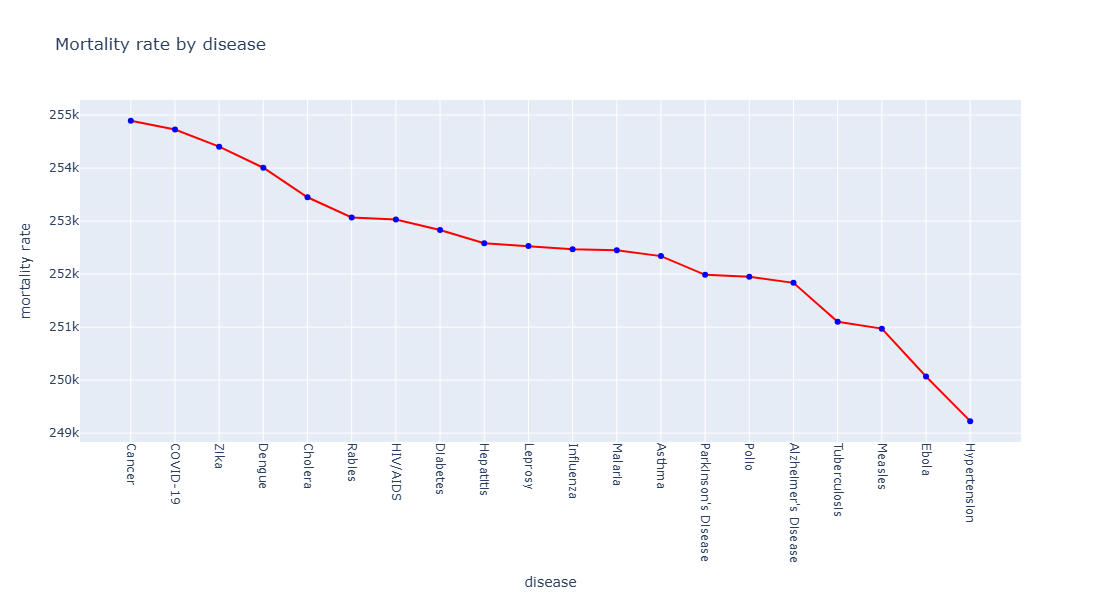

In [16]:
import plotly.graph_objects as go

death_con = df["Disease Name"].value_counts().sort_index()
death_f = df.groupby("Disease Name")["Mortality Rate (%)"].sum().sort_values(ascending=False)

fig = go.Figure(data=go.Scatter(
    x=death_f.index,
    y=death_f.values,
    mode="lines+markers",
    marker=dict(color="blue"),
    line=dict(color="red")
))

fig.update_layout(
    title="Mortality rate by disease",
    xaxis_title="disease",
    yaxis_title="mortality rate",
    xaxis=dict(
        tickmode="array",
        tickvals=death_f.index,
        ticktext=death_f.index,
        tickangle=90
    ),
    height=600,
    width=1000
)

fig.show()

In [ ]:
df.isnull().sum()

In [56]:
top_10_diseases = df["Disease Name"].value_counts().head(10).index
print(top_10_diseases)

Index(['COVID-19', 'Zika', 'Dengue', 'Cancer', 'HIV/AIDS', 'Cholera', 'Asthma',
       'Leprosy', 'Diabetes', 'Rabies'],
      dtype='object', name='Disease Name')


In [48]:
prev_rate = df["Country"].value_counts().head(10).index
print(prev_rate)

Index(['Russia', 'South Africa', 'South Korea', 'Germany', 'UK', 'Canada',
       'Mexico', 'China', 'Nigeria', 'Saudi Arabia'],
      dtype='object', name='Country')


In [44]:
mortality= df["Mortality Rate (%)"].value_counts().head(10).index 
mortality

Index([6.54, 3.6, 9.47, 0.6, 0.35, 2.58, 3.13, 5.38, 1.17, 1.49], dtype='float64', name='Mortality Rate (%)')

In [58]:
print(len(mortality))
print(len(prev_rate))
print(len(top_10_diseases))
      

10
10
10


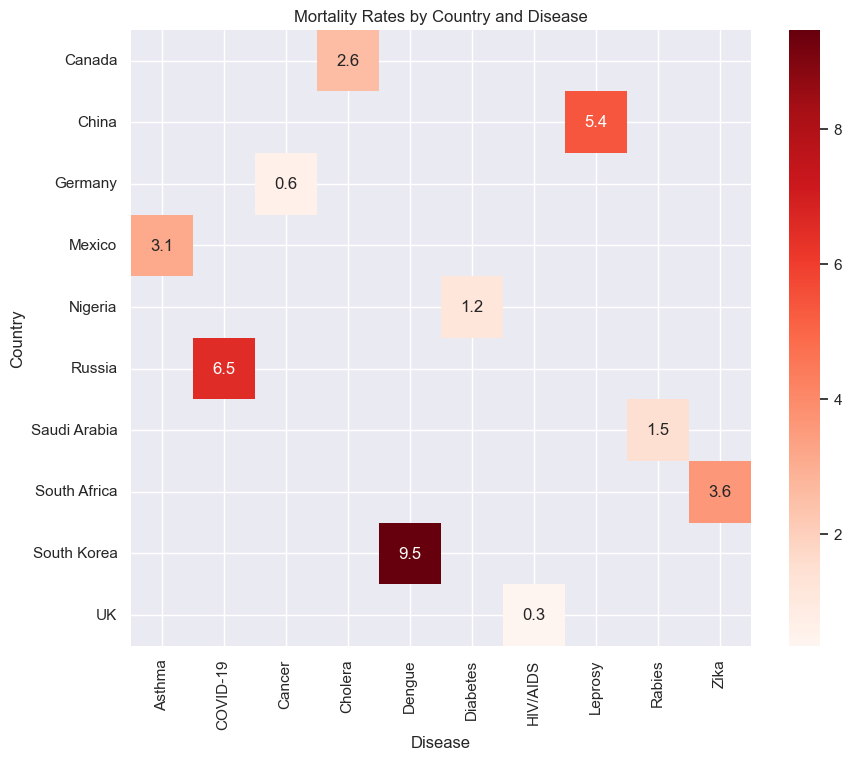

In [68]:
ayo = pd.DataFrame({
    "Country": prev_rate,
    "Disease Name": top_10_diseases,
    "Mortality Rate(%)": mortality
})

pivot_df = ayo.pivot_table(index="Country", columns="Disease Name", values="Mortality Rate(%)")

plt.figure(figsize=(10, 8))
sns.heatmap(pivot_df, annot=True, cmap="Reds", fmt=".1f")

plt.title('Mortality Rates by Country and Disease')
plt.xlabel('Disease')
plt.ylabel('Country')

plt.show()

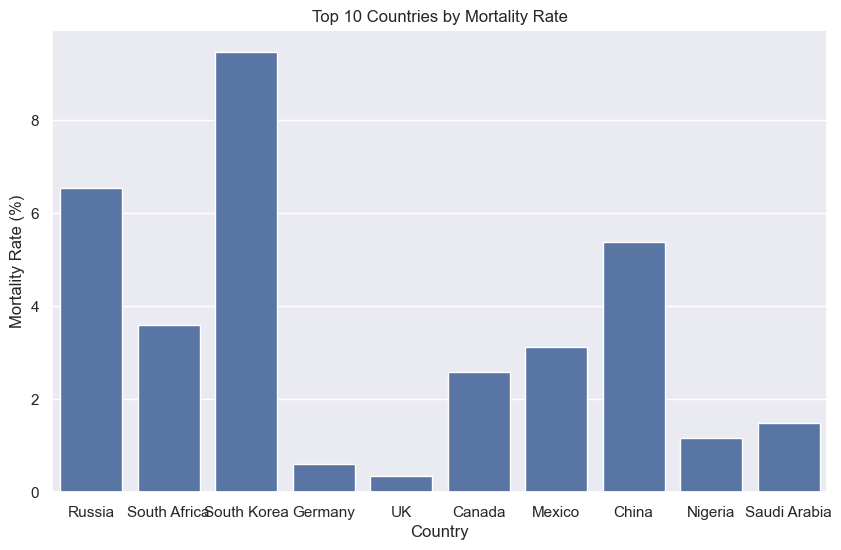

In [70]:
# Create a bar chart to show the top 10 countries by mortality rate
plt.figure(figsize=(10, 6))
sns.barplot(x=prev_rate, y=mortality)
plt.title('Top 10 Countries by Mortality Rate')
plt.xlabel('Country')
plt.ylabel('Mortality Rate (%)')
plt.show()


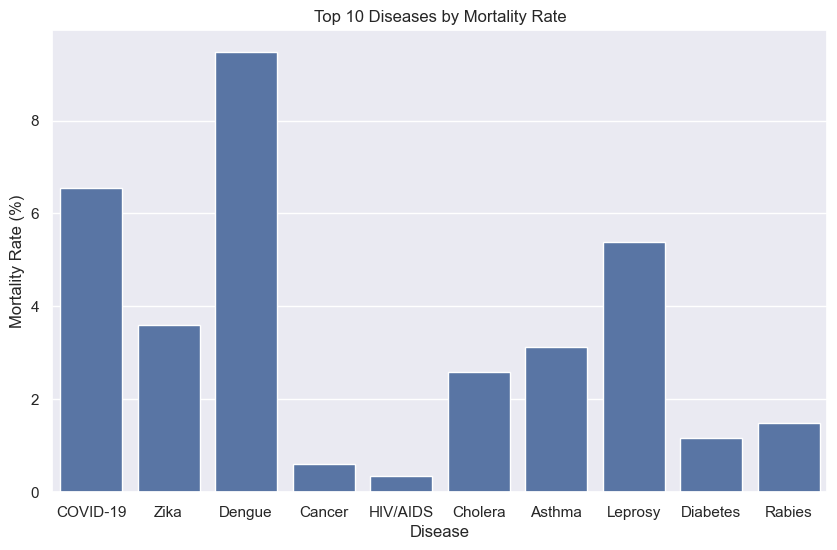

In [74]:
# Create a bar chart to show the top 10 diseases by mortality rate
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_diseases, y=mortality)
plt.title('Top 10 Diseases by Mortality Rate')
plt.xlabel('Disease')
plt.ylabel('Mortality Rate (%)')
plt.show()


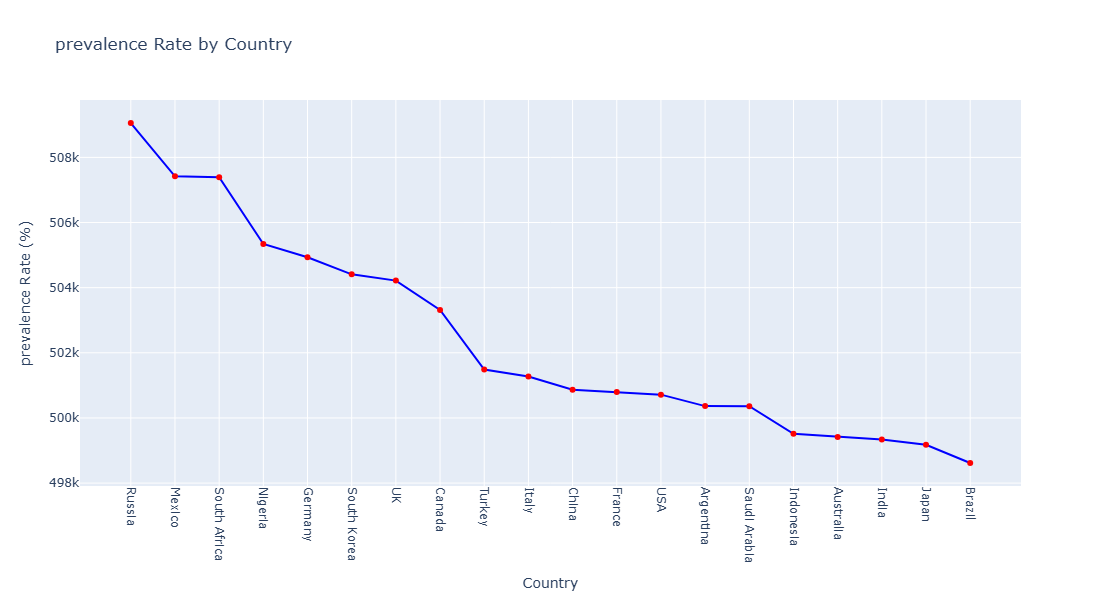

In [84]:
death_pre = df["Country"].value_counts().sort_index()
death_p = df.groupby("Country")["Prevalence Rate (%)"].sum().sort_values(ascending=False)

fig = go.Figure(data=[go.Scatter(
    x=death_p.index,
    y=death_p.values,
    mode="lines+markers",
    marker=dict(color="red"),
    line=dict(color="blue")
)])

fig.update_layout(
    title="prevalence Rate by Country",
    xaxis_title="Country",
    yaxis_title="prevalence Rate (%)",
    xaxis=dict(
        tickmode="array",
        tickvals=death_f.index,
        ticktext=death_f.index,
        tickangle=90  # Rotate country names
    ),
    height=600,
    width=1000
)

fig.show()